In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

data = pd.read_csv('train\\normal\\normal.csv')[['Pic', 'NumCircles']]
img_list = []
for i in range(1000):
    temp = cv2.imread("train\\normal\\" + '{:05}'.format(i) + '.png')
    img_list.append(cv2.resize(temp,(480, 480)))
    

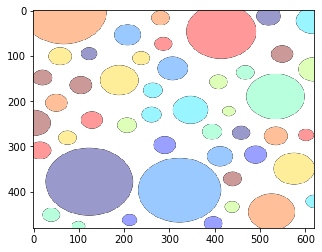

In [87]:
plt.imshow(img_list[1])
plt.show()

cv2.imshow("Image", img_list[1])
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
data

,Pic,NumCircles
0,0,30
1,1,47
2,2,48
3,3,49
4,4,27
...,...,...
995,995,34
996,996,21
997,997,44
998,998,16


57


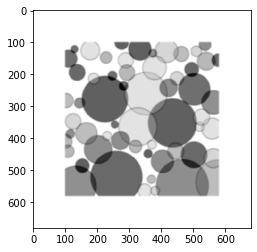

In [49]:
def len_circles(circles):
    if circles is None:
        return 0
    else:
        return len(circles[0])

def count_num(img, trs=250):
    k_size = 5    
    g_size = 11
    bordersize = 100
    
    img=cv2.copyMakeBorder(img, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
    
    kernel = np.ones((k_size,k_size),np.uint8)
    img = cv2.GaussianBlur(img, (g_size,g_size),0)
    
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_threshold = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)    
    
    # img_threshold = cv2.Laplacian(img_threshold,cv2.CV_8U) 
    #img_threshold = cv2.dilate(img_threshold,kernel,iterations = 1)
    #img_threshold = cv2.erode(img_threshold,kernel,iterations = 1)
    #img_threshold = cv2.GaussianBlur(img_threshold, (g_size,g_size),0)
    
    circles = cv2.HoughCircles(img_grey,cv2.HOUGH_GRADIENT, 1, 20, param1=5,param2=30,minRadius=6,maxRadius=85)
    #circles = cv2.HoughCircles(img_threshold,cv2.HOUGH_GRADIENT, 1, 20, param1=50,param2=30,minRadius=0,maxRadius=0)
    
    return img_grey, len_circles(circles), circles
    #return img_threshold, len_circles(circles), circles

test_idx = 2

g, n, circles = count_num(img_list[test_idx])
#g = count_num(img_list[1])
print(n)
#print(circles)

cimg = img_list[test_idx].copy()
bordersize = 100
cimg = cv2.copyMakeBorder(cimg, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(int(i[0]),int(i[1])),2,(0,0,255),3)
cv2.imshow("Orig", img_list[test_idx])
cv2.imshow("Find", cimg)
cv2.imshow("Grey", g)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(g,cmap='gray')
plt.show()

In [2]:
def len_circles(circles):
    if circles is None:
        return 0
    else:
        return len(circles[0])

def count_num(img, trs=50):
    k_size = 3    
    g_size = 5
    bordersize = 100
    
    img=cv2.copyMakeBorder(img, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize,
                              borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
    
    kernel = np.ones((k_size,k_size),np.uint8)
    #img = cv2.GaussianBlur(img, (g_size,g_size),0)
    
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_threshold = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)    
    
    img_grey = cv2.Laplacian(img_grey,cv2.CV_8U)
    img_grey = cv2.dilate(img_grey, kernel,iterations = 1)
    ret, img_grey = cv2.threshold(img_grey, trs, 255, cv2.THRESH_BINARY)
    img_grey = cv2.GaussianBlur(img_grey, (g_size,g_size),0)
    
    circles = cv2.HoughCircles(img_grey,cv2.HOUGH_GRADIENT, 1, 20, param1=5,param2=30,minRadius=6,maxRadius=85)    
    return img_grey, len_circles(circles), circles

In [3]:
n_pred_list = []
err_list = []
for i, img_i in enumerate(img_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_list.append(n_pred_i)
    n_true_i = data['NumCircles'][i]
    err_i = (float(n_true_i) - float(n_pred_i))/float(n_true_i)
    err_list.append(err_i)
    #print(n_true_i, n_pred_i, )
    
n_true = data['NumCircles'].to_numpy()
n_pred = np.array(n_pred_list)
err = np.array(err_list)

print(np.mean(err))
print('========')
print(n_pred - n_true)

-0.09149511185601114
[ 2  4 10  4  3  1  4 11  1  0  1  0  6  3 17  8  0 -1  5  3  0 12  2  7
  3  2  3  3  3  0  0  2  2  1  1  0  6  0  5  4  2  6 -1  2 -1  9  1  3
 10 15  4  5  3  4 15  0  2  8  6 -2  0 13  4 -2  3  1  1 23  1  6  6  8
  1  2  0 12  7 18  0 -1  1  5  2  4  0 12  1  4  1  1  0  2  1  4  0  0
 13  7  0  0  0  2 12  0  2  3  0  6  6 15 25  1  1  0  8  0  2  1  3  4
  3  1 12  2  2  6  5  2  8 14  0  3  0  6  3  0  8  3  2 16 11  6  0  1
  3  1  2  5  6  0  1 11  4  2 -1  1  0  3 12  2 13  2  2  5  1 -1  2 11
  0  3  1  0  7  0  4  4  3 18  3  1  8  9 17 -1  3  7  7  0 13  0  2  0
  0  0  2  1  8  6  2  0 -1 10  0  5  5  1 -1  9 -1  3  0  2  2  7  2 10
  2  3  6  7  1  5 13 17 10  2  5  4 -1  1  0  1  2  3  1  1  3  1  2  1
  0 -1  1  3  1  5  7 10  3  4  8 11 11  1 10  2 -1  2  1  2  1 15  2  4
  3  6  6  2 11  6  4  0  3 11 -2  9  3 12  2 15  8 12 19  8  2  2 11 -1
  2  1  1  2 10  3  1  6 13  2  7  8  2  6  5  3  1  6  2  8  3 15  1  3
 12  3  1  4  6  5  1  3  5  0

In [4]:
# Эта их прекрасная метрика
contribs = (1 - np.abs(n_true-n_pred)/10.)
contribs[contribs < 0] = 0
contribs.sum()

614.4

In [51]:
# Теперь считаем sub
img_sub_list = []
for i in range(500):
    temp = cv2.imread("test\\normal\\" + '{:05}'.format(i) + '.png')
    img_sub_list.append(cv2.resize(temp,(480, 480)))
    
n_pred_sub_list = []
for i, img_i in enumerate(img_sub_list):
    img_mod_i, n_pred_i, circles_i = count_num(img_i)
    n_pred_sub_list.append(n_pred_i)
    
n_pred_sub = np.array(n_pred_sub_list)
n_pred_sub

out_df = pd.DataFrame({'id' : range(500), 'num' : n_pred_sub})
out_df.to_csv('normal.csv', index=False, header=False, sep=' ')